## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

_a. Read in the dataset and take a look at the top few rows here:_

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


_b. Use the below cell to find the number of rows in the dataset._

In [3]:
#explore the number of columns and rows
df.shape
#row number only
print('Ans : The number of rows in the dataset: ' +str(df.shape[0]))

Ans : The number of rows in the dataset: 294478


_c. The number of unique users in the dataset._

In [4]:
#explore the number of unique users
print('Ans: The number of unique users in the dataset: ' +str(df.user_id.nunique()))

Ans: The number of unique users in the dataset: 290584


_d. The proportion of users converted._

In [5]:
#Calculate the mean to get the proportion of users converted
#Since the value is either 0 or 1
print('The proportion of users converted: {:.2f}%'.format(df.converted.mean()*100))

The proportion of users converted: 11.97%


In [6]:
#Other method
(df.query('converted == 1')['user_id'].nunique()/df.user_id.nunique())*100

12.104245244060237

Ans: Both of the results are similar, so the proportion of user converted is 12%.

_e._ _The number of times the_ `new_page` _and_ `treatment` _don't line up._

- Explanation

The issue that the number of times that the `new_page` and `treatment` don't line up includes 2 parts:
1. the number of times treatment group incorrectly landed on `old_page`
2. the number of times control group incorrectly landed on `new_page`

If we assume the first point is A (the second one is B), we could know that the result comes from "A or B, but not, A and B", which means "A XOR B".

In [7]:
#Calculate the result of A XOR B
df[(df.landing_page == 'new_page') ^ (df.group == 'treatment')].shape[0]

3893

In [8]:
#Other method
df[((df.landing_page != 'new_page') & (df.group == 'treatment')) |
((df.landing_page == 'new_page') & (df.group != 'treatment'))].shape[0]

3893

Ans: The number of times that the `new_page` and `treatment` don't line up is 3893.

_f. Do any of the rows have missing values?_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Ans: The data has no missing values.

`2.` For the rows where `treatment` is not aligned with `new_page` or `control` is not aligned with `old_page`, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

_a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in_ `df2`.

In [11]:
df2 = df[((df.landing_page == 'new_page') & (df.group == 'treatment')) |
((df.landing_page == 'old_page') & (df.group == 'control'))]

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df2.shape

(290585, 5)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Ans: The result indicates that there is no row that its `treatment` is not aligned with `new_page` or `control` is not aligned with `old_page`, which is great.

`3.` Use `df2` and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique `user_id`s are in `df2`?

In [14]:
print('The number of unique users in the dataset 2: ' +str(df2.user_id.nunique()))

The number of unique users in the dataset 2: 290584


b. There is one `user_id` repeated in `df2`.  What is it?

In [15]:
#Check duplication
sum(df2.user_id.duplicated())

1

In [16]:
df2[df2.user_id.duplicated()==True]['user_id']

2893    773192
Name: user_id, dtype: int64

Ans: We are sure that there is 1 `user_id` repeated in `df2`, and the `user_id` is 773192.

c. What is the row information for the repeat `user_id`? 

In [17]:
#Explore the row information
df2.loc[df2.duplicated(['user_id'],keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Ans: The result shows the information of the repeated rows.

d. Remove **one** of the rows with a duplicate `user_id`, but keep your dataframe as `df2`.

In [18]:
df2.drop_duplicates('user_id', inplace = True)
df2.shape[0]

<ipython-input-18-b8e9efb0357b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates('user_id', inplace = True)


290584

`4.` Use `df2` in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
print('The proportion of users converted: {:.2f}%'.format(df2.converted.mean()*100))

The proportion of users converted: 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
control_convert = df2[(df2.group == 'control') & (df2.converted == 1)].shape[0]
control_n = df2.query("group == 'control'").shape[0]
control_convert / control_n
print('The probability of the control group converted: {:.2f}%'.format((control_convert / control_n)*100))

The probability of the control group converted: 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
treatment_convert = df2[(df2.group == 'treatment') & (df2.converted == 1)].shape[0]
treatment_n = df2.query("group == 'treatment'").shape[0]
treatment_convert / treatment_n
print('The probability of the treatment group converted: {:.2f}%'.format((treatment_convert / treatment_n)*100))

The probability of the treatment group converted: 11.88%


d. What is the probability that an individual received the new page?

In [22]:
df2[df2.landing_page == 'new_page'].shape[0]/df2.shape[0]
print('The probability of an individual received the new page: {:.2f}%'.format((df2[df2.landing_page == 'new_page'].shape[0])/(df2.shape[0])*100))

The probability of an individual received the new page: 50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Ans:

The above results indicate 3 points:

1. The probability of a user converted regardless of the original page is 11.96%.
2. Given that the user is in the control group, the probability they converted is 12.04%.
3. Given that the user is in the treatment group, the probability they converted is 11.88%.

The probability that the user converted whether the user is in control group or treatment group is similar. Therefore, there is no strong evidence that the new page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Ans:

Hypothesis:

$$H_0: p_{old} \geq p_{new}$$
$$H_1: p_{old} < p_{new} $$

OR

$$H_0: p_{old} - p_{new} \geq 0$$
$$H_1: p_{old} - p_{new} < 0$$

where 
- $p_{old}$ means the converted rate for the old pages, which also means that in the control group.
- $p_{new}$ means the converted rate for the new pages, which also means that in the treatment group.

Source: https://www.stevesque.com/symbols/

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the `converted` success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the `converted` rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in `converted` between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Conversion rate means the number of the users converted divided by the number of total unique users.

In [23]:
#Calculate conversion rate for p_new under the null
p_new = df2[df2['converted']==1]['user_id'].nunique()/df['user_id'].nunique()
p_new2 = p_new*100
p_new2

11.959708724499627

In [24]:
print('The conversion rate for p_new is: ' + '%.2f' %p_new2 + '%')

The conversion rate for p_new is: 11.96%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
#Calculate conversion rate for p_old under the null
p_old = df2[df2['converted']==1]['user_id'].nunique()/df['user_id'].nunique()
p_old2 = p_old*100
p_old2

11.959708724499627

In [26]:
print('The conversion rate for p_old is: ' + '%.2f' %p_old2 + '%')

The conversion rate for p_old is: 11.96%


c. What is $n_{new}$?

In [27]:
#Calculate the number of the users in the treatment group
n_new = len(df2.query("group == 'treatment'"))
print('The number of the users in the treatment group is: '+str(n_new))

The number of the users in the treatment group is: 145310


d. What is $n_{old}$?

In [28]:
#Calculate the number of the users in the control group
n_old = len(df2.query("group == 'control'"))
print('The number of the users in the control group is: '+str(n_old))

The number of the users in the control group is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in `new_page_converted`.

In [29]:
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)])
len(new_page_converted), new_page_converted

(145310, array([0, 0, 0, ..., 0, 1, 0]))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in `old_page_converted`.

In [30]:
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)])
len(old_page_converted), old_page_converted

(145274, array([0, 1, 0, ..., 0, 0, 0]))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0009795531148154984

In [32]:
diff2 = diff*100
print('The difference of p_new and p_old is: ' + '%.2f' %diff2 + '%')

The difference of p_new and p_old is: -0.10%


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called `p_diffs`.

In [33]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the `p_diffs`.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

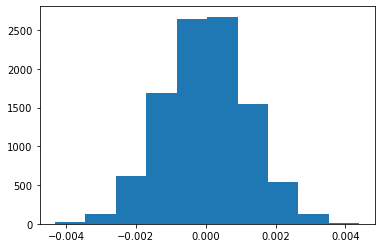

In [34]:
plt.hist(p_diffs);

Ans:
The histogram shows that `p_diff` follows normal distribution after 10,000-times simulation. The result looks like what I expected since it follows central limit theorem* (CLT).

*Central Limit Theorem: it states that when an infinite number of successive random samples are taken from a population, the sampling distribution of the means of those samples will become approximately normally distributed

Source: https://builtin.com/data-science/understanding-central-limit-theorem

j. What proportion of the `p_diffs` are greater than the actual difference observed in **ab_data.csv**?

In [35]:
#Calculate actual difference observed in excel data
p_old_actual = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()/n_old
p_new_actual = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()/n_new

diff_actual = p_new_actual - p_old_actual
diff_actual
print('The actual difference is: ', diff_actual)

The actual difference is:  -0.0015782389853555567


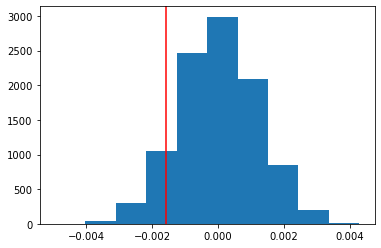

In [39]:
#Calculate and plot the null_vals based on the std of p_diffs (10000-times simulation)
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), 10000)
plt.hist(null_vals);
plt.axvline(diff_actual, color = 'red')

In [40]:
#(p_diffs > diff_actual).mean()
(null_vals > diff_actual).mean()

0.9101

Ans:

To calculate the null_vals based on the standard deviation of `p_diffs`, first change the format of `p_diffs` from list to array. Then plot the actual difference to see the proportion (the red line).

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Ans:

The value computed is called **p-value** in scientific studies. Given the Type I error is 5%, the **p-value** is 0.9, which indicates that there is no significant evidence to reject the null hypothesis. In other words, the conversion rate of the new page has no significantly different than that of the old page. The actual difference is nearly 0, which also illustrates the same result.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

The result shows the **z-score** and **p-value**. The reason that using "smaller" in the function is that the hypothesis test is pnew > pold, in other words, pold < pnew.

Source: https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Ans:

The result indicates the same findings in parts **j.** and **k.**. The **p-value** here is 0.9, which is larger than the Type I error rate. According to the result, we have no strong evidence to reject the null hypothesis, which means the conversion rates of both new page and old page are similar.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

_a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?_

Ans:

The **Logistic Regression model** should be applied since the target variable is categorical or in other words, binary (whether it is converted).

b. The goal is to use `statsmodels` to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an `intercept` column, as well as an `ab_page` column, which is 1 when an individual receives the `treatment` and 0 if `control`.

In [43]:
#The original dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
#Add intercept column
df2['intercept'] = 1

#Create dummy variable- ab_page column to record whether the group is control or treatment
#1: treatment, 0:control
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

<ipython-input-44-67e70d9e9d0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
<ipython-input-44-67e70d9e9d0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use `statsmodels` to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
#Build logistic regression model
model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


_d. Provide the summary of your model below, and use it as necessary to answer the following questions._

In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        11:43:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the **p-value** associated with `ab_page`? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Ans:

The **p-value** associated with `ab_page` is 0.190, which is different from the value in **Part II**. The reason is that the null and alternative hypothesis here are different from that in **Part II**:

1. Here:
$$H_0: p_{old} = p_{new}$$
$$H_0: p_{old} \neq p_{new}$$

>The null hypothesis tests if there is no difference between the control and the treatment group, while alternative hypothesis is that there is difference between the two groups.

2. Part II:
$$H_0: p_{old} \geq p_{new}$$
$$H_1: p_{old} < p_{new} $$

>The null hypothesis assumes that the converted for the old pages (control group) is equal or better than that for the new pages (treatment group). The alternative hypothesis tests that the converted for the old pages is worse than that for the new pages.

where 
- $p_{old}$ means the converted rate for the old pages, which also means that in the control group.
- $p_{new}$ means the converted rate for the new pages, which also means that in the treatment group.

To summarize, **Part II** assumes that the old page performs equal or better than the new page at a Type I error rate of 5%, while the logistic regression model aims to determine if the landing page (independent variable) has an effect on the conversion rate (dependent variable). 


_f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?_

In [47]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


Ans:

The above result shows that the other factors that might affect whether an individual convert is `timestamp`. Since the time of an individual visit the page varies, we could add this factor into the model to see if the visiting time of a single user affects the conversion rate. The factor could be converted into another time period, such as month, weekday, or simply divided into morning, afternoon and evening.

However, whether adding new terms into the existing model should be carefully considered since there are some assumptions when applying logistic regression model. Not considering those issues might cause some disadvantages. For example, Geeksforgeeks points out 2 main points:

1. Logistic Regression assumes the linearity between the dependent variable and the independent variables.
2. It requires average or no multicollinearity between independent variables.

Both of the points are important, especially the second one. ResearchDate warns that if there are high correlations among independent variables, this may lead to unstable estimates of regression coefficients, and thus, unreliable result.


Source:

Geeksforgeeks, 2020:
https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

ResearchDate, 2013:
https://www.researchgate.net/post/How_is_logistic_regression_used_What_conditions_and_types_of_variables_should_be_used

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [49]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [50]:
#Joining tables
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='left')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   country       290584 non-null  object
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   ab_page       290584 non-null  uint8 
dtypes: int64(2), object(4), uint8(1)
memory usage: 25.8+ MB


In [52]:
#Check the value of countries
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
#Create dummy variables
countries = pd.get_dummies(df_new['country'])
df_new['country_CA'] = countries['CA']
df_new['country_UK'] = countries['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [54]:
#Build logistic regression model
model2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'country_CA', 'country_UK']])
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [55]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        11:44:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_CA    -0.0408      0.027     -1.516      0.130      -0.093       0.012
country_UK     0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [56]:
#Exponentiated the results used for the interpretation
np.exp(result2.params)

intercept     0.136795
ab_page       0.985168
country_CA    0.960062
country_UK    1.009932
dtype: float64

Ans:

The **p-value** of `ab_page`, `country_CA` and `country_UK` are all larger than the Type I error rate, which is 5%. Moreover, the coefficients of the three variables are around 0, and the confidence interval for the values cross 0. The exponent of the three variables are nearly 1. The results shows that the relationship between the target variable and these variables is either positive or negative. Therefore, the three variables are not reliable factors of `converted`.

_h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model._

_Provide the summary results, and your conclusions based on the results._

In [57]:
#Create a new dataframe from df_new
df_new2 = df_new.copy()
df_new2.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [58]:
#Create interaction variable between page and country
df_new2['CA_ab_page'] = df_new2['country_CA'] * df_new2['ab_page']
df_new2['UK_ab_page'] = df_new2['country_UK'] * df_new2['ab_page']
model3 = sm.Logit(df_new2['converted'], df_new2[['intercept','ab_page','country_CA', 'country_UK','CA_ab_page','UK_ab_page']])
result3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [59]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        11:44:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
country_CA    -0.0175      0.038     -0.465      0.642      -0.091       0.056
country_UK    -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [60]:
#Exponentiated the results used for the interpretation
np.exp(result3.params)

intercept     0.137178
ab_page       0.979646
country_CA    0.982625
country_UK    0.994272
CA_ab_page    0.954198
UK_ab_page    1.031896
dtype: float64

Ans:

Samely, the **p-value** of all the variables are larger than 5%. The coefficients and the exponents of the variables are around 0 and 1, and the confidence intervals cross 1. It indicates that applying the revised model, the three variables are still not reliable predictor of the conversion.  

<a id='conclusions'></a>
## Conclusions

According to the results of the two models, we can conclude that:

1. Comparing the result of the two models, we know that even though including page and country information, all the factors still has no significant effect on the conversion rate.

2. If we focus on the coefficient of each factor and ignore their **p-value**, there are some findings:

>- The new-page user from the UK is more likely to be converted, given the exponent of the coefficient is 1.03, which is more than 1.
>
>- The new-page user from CA is less likely to be converted, considering the exponent of efficient is less than 1 (0.95).

However, combining the results of hypothesis testing and logistic regression, the conversion rate of the old page and the new page has no significant difference according to the existing data. The company could either conduct this experiment for a longer time to get more data or add another factor that might affect the conversion rate based on domain knowledge.



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1